In [1]:
import pandas as pd

## Pandas / Python References <br>
String Methods: https://www.w3schools.com/python/python_ref_string.asp <br>
DataFrame Reference: https://www.w3schools.com/python/pandas/pandas_ref_dataframe.asp <br>


In [2]:
# ORIGINAL DATAFRAME 
# df = pd.read_csv(r'C:\Users\Cessn\OneDrive\Desktop\sample_datasets\data_scientist\csv_files\messy_crm_dataset.csv', nrows = 10)

df= pd.read_csv(r'C:\Users\Cessn\OneDrive\Desktop\sample_datasets\data_scientist\csv_files\DataScientist2.csv')
df_copy = df.copy()
print(df_copy.info())
print("DF SHAPE: ", df_copy.shape)

df_copy.columns.str.lower()
df_copy.columns.str.replace(r'[^a-z0-9]+', '_', regex=True)
df_copy.columns.str.strip()


#Create FILE TO BE CLEANSED
# Call load_file function 
# file_toBe_cleansed = (r'C:\Users\Cessn\OneDrive\Desktop\sample_datasets\data_scientist\csv_files\messy_crm_dataset.csv', nrows = 10)
# print(file_toBe_cleansed.shape, "\n", file_toBe_cleansed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3912 non-null   int64  
 1   index              3912 non-null   int64  
 2   Job Title          3911 non-null   object 
 3   Salary Estimate    3912 non-null   object 
 4   Job Description    3911 non-null   object 
 5   Rating             3912 non-null   float64
 6   Company Name       3912 non-null   object 
 7   Location           3912 non-null   object 
 8   Headquarters       3911 non-null   object 
 9   Size               3912 non-null   object 
 10  Founded            3912 non-null   int64  
 11  Type of ownership  3911 non-null   object 
 12  Industry           3910 non-null   object 
 13  Sector             3912 non-null   object 
 14  Revenue            3912 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3912 

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

# 8 Most Common Data Cleansing Techniques:

## 1. Dropping Columns: 
cols_to_drop = [""] > df_copy.drop(to_drop, axis = 1)
NOTE: 
axis = 0 (rows) 
axis = 1 (columns)

In [3]:
# Drop irrelevant columns
cols_to_drop = ["Unnamed: 0", "Headquarters", "Founded", "Type of ownership", "Competitors"]

df_copy = df_copy.drop(cols_to_drop, axis = 1) 



In [4]:
df_copy.to_csv('output.csv')

## 2. Removing Duplicates
## Info - https://www.w3schools.com/python/pandas/ref_df_duplicated.asp

Syntax Example:
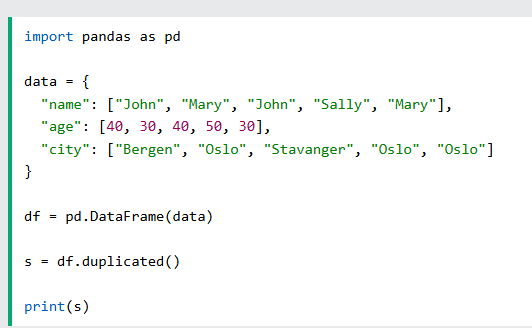

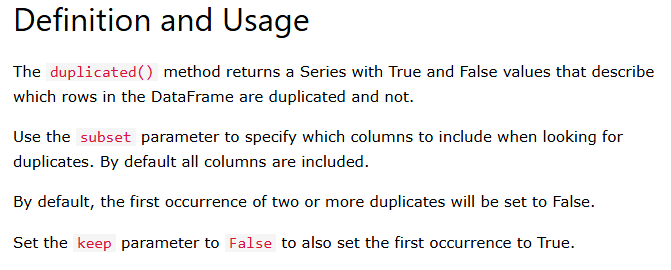

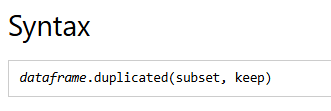

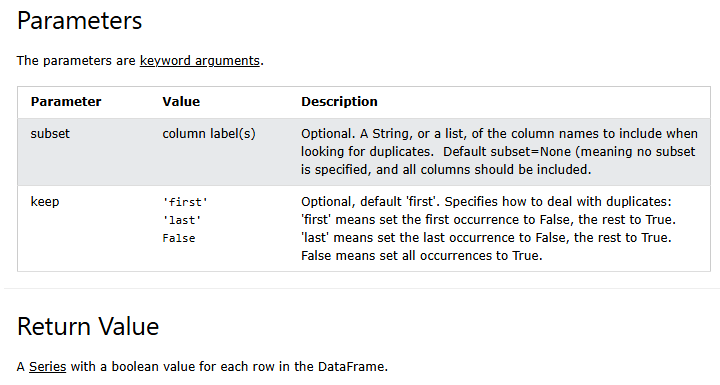

Syntax:  <br>
get duplicates returned in DataFrame Format: df_copy[df_copy.duplicated()] <br>
get duplicates returned in Text Format: df_copy.duplicated() <br>


# 3. Removing Irrelevant Rows

In [5]:
# CHeck for Jobs located in State of Ohio in DataFrame:
df_copy['Location'].str.contains("Oh", case=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3907     True
3908     True
3909     True
3910     True
3911     True
Name: Location, Length: 3912, dtype: bool

## 4. Removing Nulls and Blanks
# Get count of na (Not a Number values) - df_copy.isna().sum

# Get count of null (null values) - df_copy.isnull().sum
# Get count of null / na values fpr specific column - df["column name"].isna() / df['column name'].isnull()
# For multiple columns pass a list of column names in - df.[["list_of_column_names"]].isna()

In [6]:
df_copy.isnull()

index  Job Title  Salary Estimate  Job Description  Rating  \
0     False      False            False            False   False   
1     False      False            False            False   False   
2     False      False            False            False   False   
3     False      False            False             True   False   
4     False      False            False            False   False   
...     ...        ...              ...              ...     ...   
3907  False      False            False            False   False   
3908  False      False            False            False   False   
3909  False      False            False            False   False   
3910  False      False            False            False   False   
3911  False      False            False            False   False   

      Company Name  Location   Size  Industry  Sector  Revenue  Easy Apply  
0            False     False  False     False   False    False       False  
1            False     False  False     False   False    False       False  
2            False     False  False     False   False    False       False  
3            False     False  False      True   False    False       False  
4            False     False  False      True   False    False       False  
...            ...       ...    ...       ...     ...      ...         ...  
3907         False     False  False     False   False    False       False  
3908         False     False  False     False   False    False       False  
3909         False     False  False     False   False    False       False  
3910         False     False  False     False   False    False       False  
3911         False     False  False     False   False    False       False  

[3912 rows x 12 columns]

In [7]:
# Return sum of all null values in all columns
df_copy.isnull().sum()

index              0
Job Title          1
Salary Estimate    0
Job Description    1
Rating             0
Company Name       0
Location           0
Size               0
Industry           2
Sector             0
Revenue            0
Easy Apply         0
dtype: int64

In [8]:
# Note parameter inplace=True modifies current working copy of dataframe
# Otherwise will return a new datafram w/ requested information
df_copy.dropna(inplace=True, subset=["Job Title", "Job Description", "Industry"])
df_copy.isnull().sum()

index              0
Job Title          0
Salary Estimate    0
Job Description    0
Rating             0
Company Name       0
Location           0
Size               0
Industry           0
Sector             0
Revenue            0
Easy Apply         0
dtype: int64

# 5 - Standarzing Values (6:26)


In [9]:
# NOTE use df.loc as shown below to get specific column info
df_copy.loc[0:, ["Job Title"]]

Job Title
0                                 Senior Data Scientist
1                     Data Scientist, Product Analytics
2                                  Data Science Manager
5                                        Data Scientist
7                       Quantitative Research Associate
...                                                 ...
3907                   Security Analytics Data Engineer
3908  Patient Safety Physician or Safety Scientist -...
3909                   Security Analytics Data Engineer
3910                   Security Analytics Data Engineer
3911  Patient Safety Physician or Safety Scientist -...

[3909 rows x 1 columns]

In [10]:
# Return all elements in Job Title column where Job Title string contains a specific word
df_copy[df_copy["Job Title"].str.contains('scientist', case=False)]


index                                          Job Title  \
0         0                              Senior Data Scientist   
1         1                  Data Scientist, Product Analytics   
5         5                                     Data Scientist   
8         8                                       AI Scientist   
10       10                                     Data Scientist   
...     ...                                                ...   
3884   4355          Senior Research Scientist - RI IPP Cooper   
3893   4364   Biotransformation Scientist and DMPK Design Lead   
3895   4366  Senior/Principal Scientist - Display Technolog...   
3908   4379  Patient Safety Physician or Safety Scientist -...   
3911   4379  Patient Safety Physician or Safety Scientist -...   

                   Salary Estimate  \
0     $111K-$181K (Glassdoor est.)   
1     $111K-$181K (Glassdoor est.)   
5     $111K-$181K (Glassdoor est.)   
8     $111K-$181K (Glassdoor est.)   
10    $111K-$181K (Glassdoor est.)   
...                            ...   
3884   $55K-$112K (Glassdoor est.)   
3893   $55K-$112K (Glassdoor est.)   
3895   $55K-$112K (Glassdoor est.)   
3908   $55K-$112K (Glassdoor est.)   
3911   $55K-$112K (Glassdoor est.)   

                                        Job Description  Rating  \
0     ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1     At Noom, we use scientifically proven methods ...     4.5   
5     Job Brief\n\nThe ideal candidate will have pre...     2.9   
8     Paige is a software company helping pathologis...     5.0   
10    Company Description:\n\nQuartet is a pioneerin...     3.9   
...                                                 ...     ...   
3884  JOB POSTING – Senior Research Scientist – RI I...     3.7   
3893  Help us transform patients' lives.\n\nAt UCB, ...     3.7   
3895  Help us transform patients' lives.\n\nAt UCB, ...     3.7   
3908  Help us transform patients' lives.\nAt UCB, we...     3.7   
3911  Help us transform patients' lives.\nAt UCB, we...     3.7   

                             Company Name      Location  \
0                             Hopper\n3.5  New York, NY   
1                            Noom US\n4.5  New York, NY   
5                      IFG Companies\n2.9  New York, NY   
8                              Paige\n5.0  New York, NY   
10                    Quartet Health\n3.9  New York, NY   
...                                   ...           ...   
3884  Nationwide Children's Hospital\n3.7  Columbus, OH   
3893                             UCB\n3.7    Slough, OH   
3895                             UCB\n3.7    Slough, OH   
3908                             UCB\n3.7    Slough, OH   
3911                             UCB\n3.7    Slough, OH   

                         Size                                 Industry  \
0       501 to 1000 employees                          Travel Agencies   
1      1001 to 5000 employees                Health, Beauty, & Fitness   
5        201 to 500 employees                       Insurance Carriers   
8           1 to 50 employees  Enterprise Software & Network Solutions   
10       201 to 500 employees  Enterprise Software & Network Solutions   
...                       ...                                      ...   
3884         10000+ employees         Health Care Services & Hospitals   
3893  5001 to 10000 employees                Biotech & Pharmaceuticals   
3895  5001 to 10000 employees                Biotech & Pharmaceuticals   
3908  5001 to 10000 employees                Biotech & Pharmaceuticals   
3911  5001 to 10000 employees                Biotech & Pharmaceuticals   

                         Sector                   Revenue Easy Apply  
0              Travel & Tourism  Unknown / Non-Applicable         -1  
1             Consumer Services  Unknown / Non-Applicable         -1  
5                     Insurance  Unknown / Non-Applicable         -1  
8        Information Technology  Unknown / Non-Applicable       TRUE 

In [11]:
# Standardize all strings containing word scientist to read "Data Scientist"
df_copy.loc[df_copy["Job Title"].str.contains("scientist", case=False), "Job Title"] = "Data Scientist"

In [12]:
# Check to ensure fields in Job Title Column have been updated
df_copy.loc[:, "Job Title"]

0                         Data Scientist
1                         Data Scientist
2                   Data Science Manager
5                         Data Scientist
7        Quantitative Research Associate
                      ...               
3907    Security Analytics Data Engineer
3908                      Data Scientist
3909    Security Analytics Data Engineer
3910    Security Analytics Data Engineer
3911                      Data Scientist
Name: Job Title, Length: 3909, dtype: object

In [13]:
# Capture /show all strings containing the letter k or K in column Salary Estimate 
df_copy.loc[df_copy["Salary Estimate"].str.contains("k", case=False), "Salary Estimate"]


0       $111K-$181K (Glassdoor est.)
1       $111K-$181K (Glassdoor est.)
2       $111K-$181K (Glassdoor est.)
5       $111K-$181K (Glassdoor est.)
7       $111K-$181K (Glassdoor est.)
                    ...             
3907     $55K-$112K (Glassdoor est.)
3908     $55K-$112K (Glassdoor est.)
3909     $55K-$112K (Glassdoor est.)
3910     $55K-$112K (Glassdoor est.)
3911     $55K-$112K (Glassdoor est.)
Name: Salary Estimate, Length: 3888, dtype: object

In [14]:
# Replace letter "k" Salary Estimate column with 000 
# Final value: 181K - 182K > 181000 - 182000
replace_dict ={"\$": "", 
               "K": "000",
              }
df_copy["Salary Estimate"] = df_copy['Salary Estimate'].replace(replace_dict, regex=True)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Cessn\AppData\Local\Temp\ipykernel_21452\3318404103.py:3: SyntaxWarning: invalid escape sequence '\$'
  replace_dict ={"\$": "",


In [15]:
df_copy["Salary Estimate"]

0       111000-181000 (Glassdoor est.)
1       111000-181000 (Glassdoor est.)
2       111000-181000 (Glassdoor est.)
5       111000-181000 (Glassdoor est.)
7       111000-181000 (Glassdoor est.)
                     ...              
3907     55000-112000 (Glassdoor est.)
3908     55000-112000 (Glassdoor est.)
3909     55000-112000 (Glassdoor est.)
3910     55000-112000 (Glassdoor est.)
3911     55000-112000 (Glassdoor est.)
Name: Salary Estimate, Length: 3909, dtype: object

# 6 - Splitting Columns 8:16
## Documentation: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

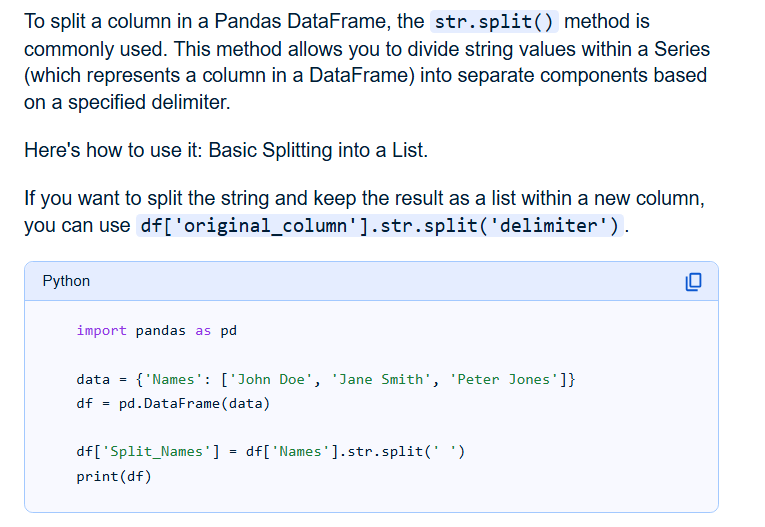 <br>
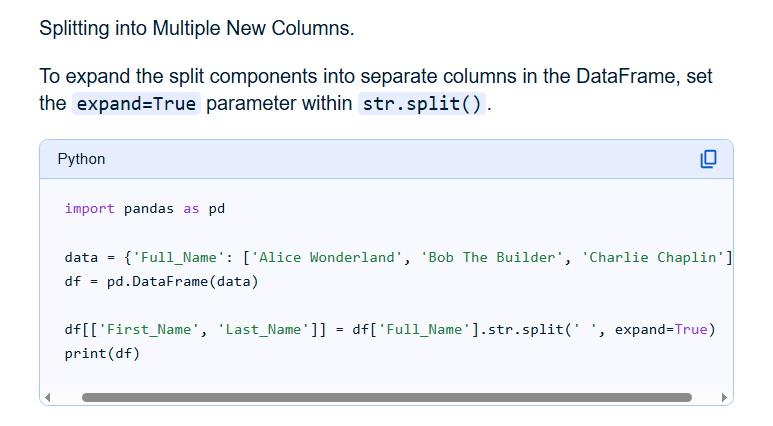 <br>
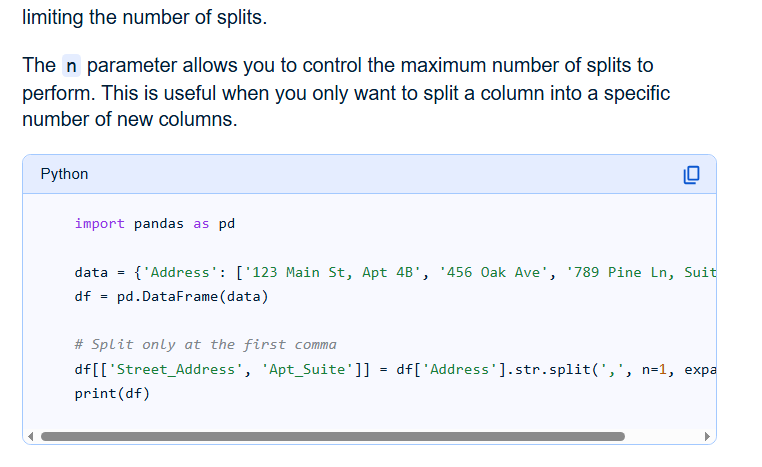 <br>
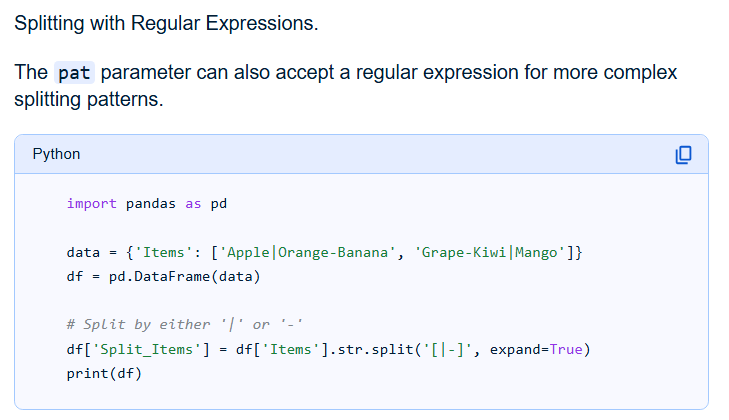 <br>

In [16]:
# Goal - Split values in Salary Estimate column into 2 separate columns
# Est min salary and Est max salary

# Get list of column names in dataframe
df_copy.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Easy Apply'],
      dtype='object')

In [17]:
# Show values at all rows in column " Salary Estimate"
df_copy.loc[:, 'Salary Estimate']

0       111000-181000 (Glassdoor est.)
1       111000-181000 (Glassdoor est.)
2       111000-181000 (Glassdoor est.)
5       111000-181000 (Glassdoor est.)
7       111000-181000 (Glassdoor est.)
                     ...              
3907     55000-112000 (Glassdoor est.)
3908     55000-112000 (Glassdoor est.)
3909     55000-112000 (Glassdoor est.)
3910     55000-112000 (Glassdoor est.)
3911     55000-112000 (Glassdoor est.)
Name: Salary Estimate, Length: 3909, dtype: object

In [18]:
# Split "Salary Estimate" colulmn into 2 separate cols as per SYNTAX below
# Note expand=True parameter expands data beyond specified delimitter into new column
df_copy[['Est min salary','Est max salary']] = df_copy["Salary Estimate"].str.split("-", expand=True)

In [19]:
# Check to ensure info split into 2 columns
df_copy[['Est min salary','Est max salary']]


Est min salary           Est max salary
0            111000  181000 (Glassdoor est.)
1            111000  181000 (Glassdoor est.)
2            111000  181000 (Glassdoor est.)
5            111000  181000 (Glassdoor est.)
7            111000  181000 (Glassdoor est.)
...             ...                      ...
3907          55000  112000 (Glassdoor est.)
3908          55000  112000 (Glassdoor est.)
3909          55000  112000 (Glassdoor est.)
3910          55000  112000 (Glassdoor est.)
3911          55000  112000 (Glassdoor est.)

[3909 rows x 2 columns]

In [20]:
replace_dict3 = {"\D": '',}
df_copy["Est max salary"] = df_copy["Est max salary"].replace(replace_dict3, regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Cessn\AppData\Local\Temp\ipykernel_21452\227307964.py:1: SyntaxWarning: invalid escape sequence '\D'
  replace_dict3 = {"\D": '',}


In [21]:
df_copy["Est max salary"]

0       181000
1       181000
2       181000
5       181000
7       181000
         ...  
3907    112000
3908    112000
3909    112000
3910    112000
3911    112000
Name: Est max salary, Length: 3909, dtype: object

In [22]:
# Place text "(Glassdoor est.) into its own column
df_copy["Source"] = "Glassdoor"

In [23]:
df_copy["Source"]

0       Glassdoor
1       Glassdoor
2       Glassdoor
5       Glassdoor
7       Glassdoor
          ...    
3907    Glassdoor
3908    Glassdoor
3909    Glassdoor
3910    Glassdoor
3911    Glassdoor
Name: Source, Length: 3909, dtype: object

In [24]:
df_copy['Source']

0       Glassdoor
1       Glassdoor
2       Glassdoor
5       Glassdoor
7       Glassdoor
          ...    
3907    Glassdoor
3908    Glassdoor
3909    Glassdoor
3910    Glassdoor
3911    Glassdoor
Name: Source, Length: 3909, dtype: object

In [25]:
df_copy.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Easy Apply', 'Est min salary', 'Est max salary', 'Source'],
      dtype='object')

In [26]:
df_copy.head()

index                        Job Title                 Salary Estimate  \
0      0                   Data Scientist  111000-181000 (Glassdoor est.)   
1      1                   Data Scientist  111000-181000 (Glassdoor est.)   
2      2             Data Science Manager  111000-181000 (Glassdoor est.)   
5      5                   Data Scientist  111000-181000 (Glassdoor est.)   
7      7  Quantitative Research Associate  111000-181000 (Glassdoor est.)   

                                     Job Description  Rating  \
0  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1  At Noom, we use scientifically proven methods ...     4.5   
2  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0   
5  Job Brief\n\nThe ideal candidate will have pre...     2.9   
7  Seeking a quant to work with senior researcher...    -1.0   

             Company Name      Location                    Size  \
0             Hopper\n3.5  New York, NY   501 to 1000 employees   
1            Noom US\n4.5  New York, NY  1001 to 5000 employees   
2                Decode_M  New York, NY       1 to 50 employees   
5      IFG Companies\n2.9  New York, NY    201 to 500 employees   
7  Enlightenment Research  New York, NY       1 to 50 employees   

                    Industry             Sector                   Revenue  \
0            Travel Agencies   Travel & Tourism  Unknown / Non-Applicable   
1  Health, Beauty, & Fitness  Consumer Services  Unknown / Non-Applicable   
2                         -1                 -1  Unknown / Non-Applicable   
5         Insurance Carriers          Insurance  Unknown / Non-Applicable   
7                         -1                 -1  Unknown / Non-Applicable   

  Easy Apply Est min salary Est max salary     Source  
0         -1         111000         181000  Glassdoor  
1         -1         111000         181000  Glassdoor  
2       TRUE         111000         181000  Glassdoor  
5         -1         111000         181000  Glassdoor  
7       TRUE         111000         181000  Glassdoor

In [27]:
df_copy.to_csv('output.csv')

# 7 - Convert Datatypes
## Youtube: https://youtu.be/FbFQH_RNMu0?t=613 <br>
## Code Examples: https://docs.google.com/document/d/1HiZYEBH_5RaNjvvVtOodOFB0z-ji_4kx-kF9pv1IE-U/edit?tab=t.0
## Convert datatype: multiple columns: <br>
## Convert datatype: multiple columns to datatype int:<br>
convert_dtypes ={'colName_1': 'int', 'colName_2': 'int',}
df = df.astype(convert_dtypes)

## CONVERT datatype of single column <br>
df['colName_1'] = df['colName_1'].astype("specify_datatype")

# 8 - Stripping Strings <br>
## Youtube - https://youtu.be/FbFQH_RNMu0?t=648

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3909 entries, 0 to 3911
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3909 non-null   int64  
 1   Job Title        3909 non-null   object 
 2   Salary Estimate  3909 non-null   object 
 3   Job Description  3909 non-null   object 
 4   Rating           3909 non-null   float64
 5   Company Name     3909 non-null   object 
 6   Location         3909 non-null   object 
 7   Size             3909 non-null   object 
 8   Industry         3909 non-null   object 
 9   Sector           3909 non-null   object 
 10  Revenue          3909 non-null   object 
 11  Easy Apply       3909 non-null   object 
 12  Est min salary   3909 non-null   object 
 13  Est max salary   3909 non-null   object 
 14  Source           3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 617.7+ KB


In [36]:
df_copy.loc[:10, 'Company Name']

0                Hopper\n3.5
1               Noom US\n4.5
2                   Decode_M
5         IFG Companies\n2.9
7     Enlightenment Research
8                 Paige\n5.0
9           Jane Street\n4.8
10       Quartet Health\n3.9
Name: Company Name, dtype: object

In [45]:
cleaned_companyName= df_copy.loc[:, 'Company Name'].str[:-4]
cleaned_companyName

0                           Hopper
1                          Noom US
2                             Deco
5                    IFG Companies
7               Enlightenment Rese
                   ...            
3907    Data Resource Technologies
3908                           UCB
3909                PDS Tech, Inc.
3910    Data Resource Technologies
3911                           UCB
Name: Company Name, Length: 3909, dtype: object